In [ ]:
### This documnent countains the code required to fullfill my master thesis
### G. van der Plas

In [ ]:
#import packages
import pandas as pd
import numpy as np
import os
from google.colab import drive

from shutil import copyfile
import shutil
import random

from tqdm import tqdm
import glob 


import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import math
import csv

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers as L
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping


#import PIL
#import PIL.Image
#import pathlib
#from pathlib import Path
#import argparse

In [ ]:
print(tf.test.gpu_device_name())
!nvidia-smi
#!cat /proc/cpuinfo
# !cat /proc/meminfo

/device:GPU:0
Mon Nov 15 12:34:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    32W / 250W |    375MiB / 16280MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                          

# **UNZIP data locally in COLAB**

In [ ]:
!rm -rf  /content/malesetsplit
!rm -rf  /content/femalesetsplit
!rm -rf  /content/malesetsplit
!rm -rf  /content/femalesetsplit
!rm -rf  /content/all_labels_male_corrected.csv
!rm -rf  /content/all_labels_male_test.csv
!rm -rf  /content/all_labels_male_val.csv
!rm -rf  /content/all_labels_male_val.csv

In [ ]:
#mount drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#unzip
!unzip "/content/drive/MyDrive/Thesis_sep_2021/femaleset.zip" > /dev/null
!unzip "/content/drive/MyDrive/Thesis_sep_2021/maleset.zip"  > /dev/null

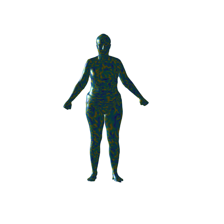

In [ ]:
#check if unzip is succesfull
imgfemale = tf.keras.preprocessing.image.load_img('/content/femaleset/SPRING0014/SPRING0014-D7-V0-H160.png')
imgfemale

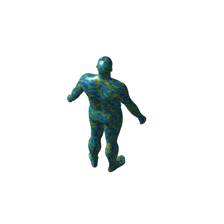

In [ ]:
imgmale = tf.keras.preprocessing.image.load_img('/content/maleset/SPRING0007/SPRING0007-D7-V40-H320.png')
imgmale

## **Separate into train and test**

In [ ]:
#list all model names
maleimg = os.listdir("/content/maleset")
femaleimg = os.listdir("/content/femaleset")

In [ ]:
#print all model names of male models
print("model names and lenght of male models:")
print(maleimg)
print(len(maleimg))
print(" ")

#print all model names of female models
print("model names and lenght of female models:")
print(femaleimg)
print(len(femaleimg))

model names and lenght of male models:
['SPRING1666', 'SPRING1594', 'SPRING3022', 'SPRING0580', 'SPRING2842', 'SPRING0301', 'SPRING2085', 'SPRING4373', 'SPRING4513', 'SPRING2831', 'SPRING4106', 'SPRING1408', 'SPRING2917', 'SPRING1840', 'SPRING2804', 'SPRING2638', 'SPRING1662', 'SPRING0578', 'SPRING4126', 'SPRING2839', 'SPRING0082', 'SPRING1542', 'SPRING0024', 'SPRING4172', 'SPRING4144', 'SPRING0481', 'SPRING4381', 'SPRING1598', 'SPRING2083', 'SPRING2414', 'SPRING2895', 'SPRING2454', 'SPRING1429', 'SPRING4574', 'SPRING2962', 'SPRING1823', 'SPRING1744', 'SPRING0285', 'SPRING2974', 'SPRING4570', 'SPRING4113', 'SPRING0648', 'SPRING2769', 'SPRING1707', 'SPRING0448', 'SPRING1193', 'SPRING4797', 'SPRING0660', 'SPRING1271', 'SPRING1205', 'SPRING2648', 'SPRING4170', 'SPRING2762', 'SPRING1223', 'SPRING0454', 'SPRING4514', 'SPRING2014', 'SPRING1406', 'SPRING1046', 'SPRING4289', 'SPRING0520', 'SPRING0415', 'SPRING2477', 'SPRING2299', 'SPRING1228', 'SPRING1333', 'SPRING2752', 'SPRING0553', 'SPRING0

In [ ]:
##
'''
Total images should be dividable by 10 otherwise the test will not work
'''
##

#Randomize and split models random over train and test
import random
random.seed(2130)
random.shuffle(maleimg)
random.shuffle(femaleimg)

##subset male 
#define subset
maleimgsubset = maleimg[:330]

#define train/val/test male
train_datamale = maleimgsubset[:270]
val_datamale = maleimgsubset[270:300]
test_datamale = maleimgsubset[300:]

##subset female 
#define subset
femaleimgsubset = femaleimg[:32]

#define train/val/test female
train_datafemale = femaleimgsubset[:24]
val_datafemale = femaleimgsubset[24:28]
test_datafemale = femaleimgsubset[28:]

In [ ]:
##
'''
Total images should be dividable by 10 otherwise the test will not work
'''
##

#check if succesfull for male
print(train_datamale)
print(val_datamale)
print(test_datamale)
print("number off male models in train = "+str(len(train_datamale)))
print("number off male models in val = "+str(len(val_datamale)))
print("number off male models in test = "+str(len(test_datamale)))
print("total number off male models is = "+str(len(test_datamale)+len(val_datamale)+len(train_datamale)))

print(" ")

#check if succesfull for female
print(train_datafemale)
print(val_datafemale)
print(test_datafemale)
print("number off female models in train = "+str(len(train_datafemale)))
print("number off female models in val = "+str(len(val_datafemale)))
print("number off female models in test = "+str(len(test_datafemale)))
print("total number off female models is = "+str(len(test_datafemale)+len(val_datafemale)+len(train_datafemale)))

['SPRING1682', 'SPRING1786', 'SPRING0242', 'SPRING1293', 'SPRING1747', 'SPRING0389', 'SPRING1707', 'SPRING0647', 'SPRING0026', 'SPRING0572', 'SPRING4585', 'SPRING1444', 'SPRING0300', 'SPRING1329', 'SPRING1455', 'SPRING4390', 'SPRING1051', 'SPRING4225', 'SPRING1842', 'SPRING1974', 'SPRING0279', 'SPRING0634', 'SPRING2680', 'SPRING4127', 'SPRING4485', 'SPRING2707', 'SPRING0618', 'SPRING1650', 'SPRING4170', 'SPRING0526', 'SPRING4290', 'SPRING4469', 'SPRING0574', 'SPRING4434', 'SPRING1587', 'SPRING1238', 'SPRING1228', 'SPRING2473', 'SPRING1094', 'SPRING1106', 'SPRING1993', 'SPRING0218', 'SPRING1165', 'SPRING4133', 'SPRING2151', 'SPRING4063', 'SPRING2670', 'SPRING1697', 'SPRING4730', 'SPRING4059', 'SPRING2608', 'SPRING0199', 'SPRING1551', 'SPRING1149', 'SPRING2058', 'SPRING4689', 'SPRING0535', 'SPRING1122', 'SPRING0297', 'SPRING4181', 'SPRING1583', 'SPRING4649', 'SPRING2790', 'SPRING2091', 'SPRING1552', 'SPRING2175', 'SPRING1570', 'SPRING0237', 'SPRING4650', 'SPRING4517', 'SPRING2649', 'SPRI

In [ ]:
##
'''
Total images should be dividable by 10 otherwise the test will not work
'''
##
## create train test split for both male and female models
#male train
destination_pathtrainmale = "/content/malesetsplit/train"
os.makedirs(destination_pathtrainmale)
#male val
destination_pathvalmale = "/content/malesetsplit/val"
os.makedirs(destination_pathvalmale)
#male test
destination_pathtestmale = "/content/malesetsplit/test"
os.makedirs(destination_pathtestmale)

#female train
destination_pathtrainfemale = "/content/femalesetsplit/train"
os.makedirs(destination_pathtrainfemale)
#female val
destination_pathvalfemale = "/content/femalesetsplit/val"
os.makedirs(destination_pathvalfemale)
#female test
destination_pathtestfemale = "/content/femalesetsplit/test"
os.makedirs(destination_pathtestfemale)

In [ ]:
## create trainlabels for males and females


#train male
for trainlabel in train_datamale:
  pattern = "/content/maleset/"+trainlabel+"/*" 
  for img in glob.glob(pattern):
    shutil.copy(img, destination_pathtrainmale)

#val male
for vallabel in val_datamale:
  pattern = "/content/maleset/"+vallabel+"/*" 
  for img in glob.glob(pattern):
    shutil.copy(img, destination_pathvalmale)

#test male
for testlabel in test_datamale:
  pattern = "/content/maleset/"+testlabel+"/*" 
  for img in glob.glob(pattern):
    shutil.copy(img, destination_pathtestmale)




#train female
for trainlabel in train_datafemale:
  pattern = "/content/femaleset/"+trainlabel+"/*" 
  for img in glob.glob(pattern):
    shutil.copy(img, destination_pathtrainfemale)

#val female
for vallabel in val_datafemale:
  pattern = "/content/femaleset/"+vallabel+"/*" 
  for img in glob.glob(pattern):
    shutil.copy(img, destination_pathvalfemale)

#test female
for testlabel in test_datafemale:
  pattern = "/content/femaleset/"+testlabel+"/*" 
  for img in glob.glob(pattern):
    shutil.copy(img, destination_pathtestfemale)

In [ ]:
#check for male
print("male")
maleimgtrain = os.listdir("/content/malesetsplit/train")
maleimgval = os.listdir("/content/malesetsplit/val")
maleimgtest = os.listdir("/content/malesetsplit/test")
print(len(maleimgtrain))
print(len(maleimgval))
print(len(maleimgtest))
print(len(maleimgtrain)/185)
print(len(maleimgval)/185)
print(len(maleimgtest)/185)

print(" ")

#check for female
print("female")
femaleimgtrain = os.listdir("/content/femalesetsplit/train")
femaleimgval = os.listdir("/content/femalesetsplit/val")
femaleimgtest = os.listdir("/content/femalesetsplit/test")
print(len(femaleimgtrain))
print(len(femaleimgval))
print(len(femaleimgtest))
print(len(femaleimgtrain)/185)
print(len(femaleimgval)/185)
print(len(femaleimgtest)/185)


male
49950
5550
5550
270.0
30.0
30.0
 
female
4440
740
740
24.0
4.0
4.0


# **Loading principal components and create data generators**

In [ ]:
# load principal components
## female principal components
df1=pd.read_excel("/content/drive/MyDrive/Thesis_sep_2021/FemalePCs.xlsx")

## male principa components
df2=pd.read_excel("/content/drive/MyDrive/Thesis_sep_2021/MalePCs.xlsx")

In [ ]:
print(df1.head())
print(df2.head())

         Filename      PC 1      PC 2  ...      PC 9      PC10   
0  SPRING0014.obj -2.723997  0.760398  ... -0.127238  0.925548   
1  SPRING0015.obj -4.214653 -0.922275  ... -0.718815 -0.289657   
2  SPRING0017.obj -3.685222  1.550137  ... -0.022902  0.256028   
3  SPRING0052.obj -4.566391 -1.113222  ...  0.304093  0.908402   
4  SPRING0053.obj -5.206371  0.130192  ... -0.044682 -1.156143   

[5 rows x 12 columns]
         Filename      PC 1      PC 2  ...      PC 9      PC10   
0  SPRING0001.obj  8.120067 -0.261363  ... -0.363386 -0.408759   
1  SPRING0002.obj  4.453033 -1.078755  ... -0.213788  0.168963   
2  SPRING0007.obj -2.934991 -1.339783  ... -0.713374  0.244707   
3  SPRING0008.obj  4.353720  0.189972  ...  1.220515  0.100544   
4  SPRING0009.obj -0.778509 -0.409938  ...  0.358052  0.529252   

[5 rows x 12 columns]


In [ ]:
l1male=os.listdir("/content/malesetsplit/train")
l2male=os.listdir("/content/malesetsplit/val") 
l3male=os.listdir("/content/malesetsplit/test")

l1female=os.listdir("/content/femalesetsplit/train")
l2female=os.listdir("/content/femalesetsplit/val")
l3female=os.listdir("/content/femalesetsplit/test")

In [ ]:
# Name list creation
namem=[]
namefm=[]

for i in range(len(df1)):
  namefm.append(df1.Filename.iloc[i][:10])

for i in range(len(df2)):
  namem.append(df2.Filename.iloc[i][:10])

In [ ]:
# creating dictionary train male
dm1={}
dfm2={}

for i in tqdm(range(len(l1male))):
  if l1male[i][:10] in namem:
    dm1[l1male[i]]=np.asarray(df2.iloc[namem.index(l1male[i][:10])][1:11])
  
  
for i in tqdm(range(len(l1female))):
  if l1female[i][:10] in namefm:
    dfm2[l1female[i]]=np.asarray(df1.iloc[namefm.index(l1female[i][:10])][1:11])


100%|██████████| 4440/4440 [00:00<00:00, 5057.51it/s]


In [ ]:
# creating dictionary val male
dvm1={}
dvfm2={}

for i in tqdm(range(len(l2male))):
  if l2male[i][:10] in namem:
    dvm1[l2male[i]]=np.asarray(df2.iloc[namem.index(l2male[i][:10])][1:11])

for i in tqdm(range(len(l2female))):
  if l2female[i][:10] in namefm:
    dvfm2[l2female[i]]=np.asarray(df1.iloc[namefm.index(l2female[i][:10])][1:11])

100%|██████████| 740/740 [00:00<00:00, 4719.36it/s]


In [ ]:
# creating dictionary test male
dtm1={}
dtfm2={}

for i in tqdm(range(len(l3male))):
  if l3male[i][:10] in namem:
    dtm1[l3male[i]]=np.asarray(df2.iloc[namem.index(l3male[i][:10])][1:11])

for i in tqdm(range(len(l3female))):
  if l3female[i][:10] in namefm:
    dtfm2[l3female[i]]=np.asarray(df1.iloc[namefm.index(l3female[i][:10])][1:11])



100%|██████████| 740/740 [00:00<00:00, 5086.95it/s]


In [ ]:
preprocessedF=pd.DataFrame.from_dict(dfm2,orient='index')
preprocessedM=pd.DataFrame.from_dict(dm1,orient='index')

In [ ]:
preprocessedvalF=pd.DataFrame.from_dict(dvfm2,orient='index')
preprocessedvalM=pd.DataFrame.from_dict(dvm1,orient='index')

In [ ]:
preprocessedtestF=pd.DataFrame.from_dict(dtfm2,orient='index')
preprocessedtestM=pd.DataFrame.from_dict(dtm1,orient='index')

In [ ]:
print(len(preprocessedF))
print(len(preprocessedM))
print(len(preprocessedvalF))
print(len(preprocessedvalM))
print(len(preprocessedtestF))
print(len(preprocessedtestM))

4440
49950
740
5550
740
5550


In [ ]:
preprocessedF["name"]=preprocessedF.index
preprocessedM["name"]=preprocessedM.index
preprocessedvalF["name"]=preprocessedvalF.index
preprocessedvalM["name"]=preprocessedvalM.index

preprocessedtestF["name"]=preprocessedtestF.index
preprocessedtestM["name"]=preprocessedtestM.index

In [ ]:
print(preprocessedM.head())
print(preprocessedvalM.head())
print(preprocessedtestM.head())

                                    0  ...                        name
SPRING0506-D7-V30-H120.png   1.720015  ...  SPRING0506-D7-V30-H120.png
SPRING4743-D7-V10-H10.png   -4.960026  ...   SPRING4743-D7-V10-H10.png
SPRING2637-D7-V40-H300.png -11.791752  ...  SPRING2637-D7-V40-H300.png
SPRING2385-D7-V0-H100.png   -1.622081  ...   SPRING2385-D7-V0-H100.png
SPRING4579-D7-V20-H310.png  -4.612401  ...  SPRING4579-D7-V20-H310.png

[5 rows x 11 columns]
                                    0  ...                        name
SPRING1247-D7-V0-H130.png    5.347023  ...   SPRING1247-D7-V0-H130.png
SPRING4574-D7-V30-H170.png  -8.158464  ...  SPRING4574-D7-V30-H170.png
SPRING4110-D7-V40-H60.png   -9.771018  ...   SPRING4110-D7-V40-H60.png
SPRING0643-D7-V0-H300.png   -1.479452  ...   SPRING0643-D7-V0-H300.png
SPRING2762-D7-V0-H180.png  -11.374782  ...   SPRING2762-D7-V0-H180.png

[5 rows x 11 columns]
                                    0  ...                        name
SPRING0305-D7-V30-H120.png -11.

In [ ]:
preprocessedF.reset_index(inplace=True)
preprocessedM.reset_index(inplace=True)
preprocessedvalF.reset_index(inplace=True)
preprocessedvalM.reset_index(inplace=True)

preprocessedtestF.reset_index(inplace=True)
preprocessedtestM.reset_index(inplace=True)

In [ ]:
preprocessedF.drop(columns=["index"],inplace=True)
preprocessedM.drop(columns=["index"],inplace=True)
preprocessedvalF.drop(columns=["index"],inplace=True)
preprocessedvalM.drop(columns=["index"],inplace=True)

preprocessedtestF.drop(columns=["index"],inplace=True)
preprocessedtestM.drop(columns=["index"],inplace=True)

In [ ]:
preprocessedF.to_csv('all_labels_female_train.csv',index=False)
preprocessedM.to_csv('all_labels_male_train.csv',index=False)
preprocessedvalM.to_csv('all_labels_male_val.csv',index=False)
preprocessedvalF.to_csv('all_labels_female_val.csv',index=False)
preprocessedtestF.to_csv('all_labels_female_test.csv',index=False)
preprocessedtestM.to_csv('all_labels_male_test.csv',index=False)

In [ ]:
traindfmale = pd.read_csv('all_labels_male_train.csv') 
validdfmale = pd.read_csv('all_labels_male_val.csv')
testdfmale  = pd.read_csv('all_labels_male_test.csv')

traindffemale = pd.read_csv('all_labels_female_train.csv') 
validdffemale = pd.read_csv('all_labels_female_val.csv')
testdffemale = pd.read_csv('all_labels_female_test.csv')

In [ ]:
genderindexmale = [0,3]
genderindexfemale = [0,2]

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

train_generatormale=datagen.flow_from_dataframe(
    dataframe=traindfmale,
    directory='/content/malesetsplit/train',
    x_col='name',
    y_col=[str(genderindexmale[0]), str(genderindexmale[1])],
    batch_size=10,
    seed=42,
    shuffle=True,
    class_mode='raw',
    target_size=(224,448)
    )

valid_generatormale=datagen.flow_from_dataframe(
    dataframe=validdfmale,
    directory='/content/malesetsplit/val',
    x_col='name',
    y_col=[str(genderindexmale[0]), str(genderindexmale[1])],
    batch_size=10,
    seed=42,
    shuffle=True,
    class_mode='raw',
    target_size=(224,448)
    )

test_generatormale=datagen.flow_from_dataframe(
    dataframe=testdfmale,
    directory='/content/malesetsplit/test',
    x_col='name',
    y_col=[str(genderindexmale[0]), str(genderindexmale[1])],
    batch_size=10,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(224,448)
    )

Found 49950 validated image filenames.
Found 5550 validated image filenames.
Found 5550 validated image filenames.


In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
    )

train_generatorfemale=datagen.flow_from_dataframe(
    dataframe=traindffemale,
    directory='/content/femalesetsplit/train',
    x_col='name',
    y_col=[str(genderindexfemale[0]), str(genderindexfemale[1])],
    batch_size=10,
    seed=42,
    shuffle=True,
    class_mode='raw',
    target_size=(224,448)
    )

valid_generatorfemale=datagen.flow_from_dataframe(
    dataframe=validdffemale,
    directory='/content/femalesetsplit/val',
    x_col='name',
    y_col=[str(genderindexfemale[0]), str(genderindexfemale[1])],
    batch_size=10,
    seed=42,
    shuffle=True,
    class_mode='raw',
    target_size=(224,448)
    )

test_generatorfemale=datagen.flow_from_dataframe(
    dataframe=testdffemale,
    directory='/content/femalesetsplit/test',
    x_col='name',
    y_col=[str(genderindexfemale[0]), str(genderindexfemale[1])],
    batch_size=10,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(224,448)
    )

Found 4440 validated image filenames.
Found 740 validated image filenames.
Found 740 validated image filenames.


In [ ]:
male1name="male1name"
male2name="male2name"
female1name="female1name"
female2name="female2name"

In [ ]:
STEP_SIZE_TRAINmale=train_generatormale.n//train_generatormale.batch_size
STEP_SIZE_VALIDmale=valid_generatormale.n//valid_generatormale.batch_size
STEP_SIZE_TESTmale = test_generatormale.n// test_generatormale.batch_size

STEP_SIZE_TRAINfemale=train_generatorfemale.n//train_generatorfemale.batch_size
STEP_SIZE_VALIDfemale=valid_generatorfemale.n//valid_generatorfemale.batch_size
STEP_SIZE_TESTfemale = test_generatorfemale.n// test_generatorfemale.batch_size

# **Train and test**

In [ ]:
tf.keras.backend.clear_session()

#Importing the Resnet50 model is possible if the below is uncommented
model_fn=ResNet50(include_top=False, input_shape=(448,224,3),pooling='avg')

#model_fn=InceptionV3(include_top=False, input_shape=(448,224,3),pooling='avg')
model_fn.summary()


model=tf.keras.models.Sequential()
model.add(model_fn)

model.add(L.Dense(2,activation='linear'))
model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 448, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 454, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 224, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
#set hyperparamerts for learning rate, early stopping and checkpoints
rlr=ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.00001, min_delta=0.001)
ckpt=ModelCheckpoint('models/checkpoint_'+male1name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=0.0001)



#compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
                loss='mean_squared_error',
                metrics=['mean_absolute_error'])


#fit the generator
history=model.fit_generator(generator=train_generatormale,
                           steps_per_epoch=STEP_SIZE_TRAINmale,
                           validation_data=valid_generatormale,
                           validation_steps=STEP_SIZE_VALIDmale,
                           validation_freq=1,
                           epochs=50,
                           callbacks=[rlr,ckpt,es]
                           )

# save weights
model.save_weights('/content/drive/MyDrive/Thesis_sep_2021/'+male1name+'.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
4995/4995 [==============================] - ETA: 0s - loss: 6.4078 - mean_absolute_error: 1.6889
Epoch 00001: val_loss improved from inf to 7439.10840, saving model to models/checkpoint_male1name
INFO:tensorflow:Assets written to: models/checkpoint_male1name/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4995/4995 [==============================] - 711s 138ms/step - loss: 6.4078 - mean_absolute_error: 1.6889 - val_loss: 7439.1084 - val_mean_absolute_error: 67.3696 - lr: 0.0010


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 2/50
4995/4995 [==============================] - ETA: 0s - loss: 3.1196 - mean_absolute_error: 1.2190
Epoch 00002: val_loss improved from 7439.10840 to 113.11639, saving model to models/checkpoint_male1name
INFO:tensorflow:Assets written to: models/checkpoint_male1name/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4995/4995 [==============================] - 689s 138ms/step - loss: 3.1196 - mean_absolute_error: 1.2190 - val_loss: 113.1164 - val_mean_absolute_error: 7.7260 - lr: 0.0010


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 3/50
4995/4995 [==============================] - ETA: 0s - loss: 2.2531 - mean_absolute_error: 1.0428
Epoch 00003: val_loss did not improve from 113.11639
4995/4995 [==============================] - 663s 133ms/step - loss: 2.2531 - mean_absolute_error: 1.0428 - val_loss: 3067.7590 - val_mean_absolute_error: 43.4723 - lr: 0.0010
Epoch 4/50
4995/4995 [==============================] - ETA: 0s - loss: 1.8154 - mean_absolute_error: 0.9358
Epoch 00004: val_loss did not improve from 113.11639
4995/4995 [==============================] - 662s 132ms/step - loss: 1.8154 - mean_absolute_error: 0.9358 - val_loss: 1080.1207 - val_mean_absolute_error: 24.4411 - lr: 0.0010
Epoch 5/50
4995/4995 [==============================] - ETA: 0s - loss: 1.4967 - mean_absolute_error: 0.8537
Epoch 00005: val_loss improved from 113.11639 to 5.15510, saving model to models/checkpoint_male1name
INFO:tensorflow:Assets written to: models/checkpoint_male1name/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4995/4995 [==============================] - 688s 138ms/step - loss: 1.4967 - mean_absolute_error: 0.8537 - val_loss: 5.1551 - val_mean_absolute_error: 1.6322 - lr: 0.0010


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 6/50
4995/4995 [==============================] - ETA: 0s - loss: 1.2819 - mean_absolute_error: 0.7919
Epoch 00006: val_loss did not improve from 5.15510
4995/4995 [==============================] - 666s 133ms/step - loss: 1.2819 - mean_absolute_error: 0.7919 - val_loss: 1426.7554 - val_mean_absolute_error: 28.9547 - lr: 0.0010
Epoch 7/50
4995/4995 [==============================] - ETA: 0s - loss: 1.1000 - mean_absolute_error: 0.7384
Epoch 00007: val_loss did not improve from 5.15510
4995/4995 [==============================] - 664s 133ms/step - loss: 1.1000 - mean_absolute_error: 0.7384 - val_loss: 759.2838 - val_mean_absolute_error: 20.6417 - lr: 0.0010
Epoch 8/50
4995/4995 [==============================] - ETA: 0s - loss: 0.9762 - mean_absolute_error: 0.6965
Epoch 00008: val_loss did not improve from 5.15510
4995/4995 [==============================] - 666s 133ms/step - loss: 0.9762 - mean_absolute_error: 0.6965 - val_loss: 7.4261 - val_mean_absolute_error: 1.7574 - lr: 0.00

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4995/4995 [==============================] - 692s 139ms/step - loss: 0.3854 - mean_absolute_error: 0.4558 - val_loss: 1.4094 - val_mean_absolute_error: 0.8285 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 12/50
4995/4995 [==============================] - ETA: 0s - loss: 0.3190 - mean_absolute_error: 0.4178
Epoch 00012: val_loss improved from 1.40944 to 1.18662, saving model to models/checkpoint_male1name
INFO:tensorflow:Assets written to: models/checkpoint_male1name/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4995/4995 [==============================] - 693s 139ms/step - loss: 0.3190 - mean_absolute_error: 0.4178 - val_loss: 1.1866 - val_mean_absolute_error: 0.7814 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 13/50
4995/4995 [==============================] - ETA: 0s - loss: 0.2814 - mean_absolute_error: 0.3944
Epoch 00013: val_loss improved from 1.18662 to 1.17175, saving model to models/checkpoint_male1name
INFO:tensorflow:Assets written to: models/checkpoint_male1name/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4995/4995 [==============================] - 692s 139ms/step - loss: 0.2814 - mean_absolute_error: 0.3944 - val_loss: 1.1717 - val_mean_absolute_error: 0.7701 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 14/50
4995/4995 [==============================] - ETA: 0s - loss: 0.2547 - mean_absolute_error: 0.3766
Epoch 00014: val_loss did not improve from 1.17175
4995/4995 [==============================] - 666s 133ms/step - loss: 0.2547 - mean_absolute_error: 0.3766 - val_loss: 1.2027 - val_mean_absolute_error: 0.7740 - lr: 1.0000e-04
Epoch 15/50
4995/4995 [==============================] - ETA: 0s - loss: 0.2307 - mean_absolute_error: 0.3596
Epoch 00015: val_loss did not improve from 1.17175
4995/4995 [==============================] - 666s 133ms/step - loss: 0.2307 - mean_absolute_error: 0.3596 - val_loss: 1.4732 - val_mean_absolute_error: 0.8459 - lr: 1.0000e-04
Epoch 16/50
4995/4995 [==============================] - ETA: 0s - loss: 0.2081 - mean_absolute_error: 0.3425
Epoch 00016: val_loss did not improve from 1.17175
4995/4995 [==============================] - 667s 134ms/step - loss: 0.2081 - mean_absolute_error: 0.3425 - val_loss: 1.5678 - val_mean_absolute_error: 0.8734 - lr: 

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4995/4995 [==============================] - 693s 139ms/step - loss: 0.1394 - mean_absolute_error: 0.2842 - val_loss: 1.1656 - val_mean_absolute_error: 0.7692 - lr: 1.0000e-05


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 20/50
4995/4995 [==============================] - ETA: 0s - loss: 0.1350 - mean_absolute_error: 0.2796
Epoch 00020: val_loss improved from 1.16562 to 1.13514, saving model to models/checkpoint_male1name
INFO:tensorflow:Assets written to: models/checkpoint_male1name/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4995/4995 [==============================] - 694s 139ms/step - loss: 0.1350 - mean_absolute_error: 0.2796 - val_loss: 1.1351 - val_mean_absolute_error: 0.7637 - lr: 1.0000e-05


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 21/50
4995/4995 [==============================] - ETA: 0s - loss: 0.1319 - mean_absolute_error: 0.2766
Epoch 00021: val_loss improved from 1.13514 to 1.13369, saving model to models/checkpoint_male1name
INFO:tensorflow:Assets written to: models/checkpoint_male1name/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4995/4995 [==============================] - 698s 140ms/step - loss: 0.1319 - mean_absolute_error: 0.2766 - val_loss: 1.1337 - val_mean_absolute_error: 0.7634 - lr: 1.0000e-05


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 22/50
4995/4995 [==============================] - ETA: 0s - loss: 0.1308 - mean_absolute_error: 0.2753
Epoch 00022: val_loss did not improve from 1.13369
4995/4995 [==============================] - 668s 134ms/step - loss: 0.1308 - mean_absolute_error: 0.2753 - val_loss: 1.1395 - val_mean_absolute_error: 0.7646 - lr: 1.0000e-05
Epoch 23/50
4995/4995 [==============================] - ETA: 0s - loss: 0.1285 - mean_absolute_error: 0.2736
Epoch 00023: val_loss improved from 1.13369 to 1.12022, saving model to models/checkpoint_male1name
INFO:tensorflow:Assets written to: models/checkpoint_male1name/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


4995/4995 [==============================] - 695s 139ms/step - loss: 0.1285 - mean_absolute_error: 0.2736 - val_loss: 1.1202 - val_mean_absolute_error: 0.7613 - lr: 1.0000e-05


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 24/50
4995/4995 [==============================] - ETA: 0s - loss: 0.1264 - mean_absolute_error: 0.2712
Epoch 00024: val_loss did not improve from 1.12022
4995/4995 [==============================] - 671s 134ms/step - loss: 0.1264 - mean_absolute_error: 0.2712 - val_loss: 1.1288 - val_mean_absolute_error: 0.7618 - lr: 1.0000e-05
Epoch 25/50
4995/4995 [==============================] - ETA: 0s - loss: 0.1253 - mean_absolute_error: 0.2702
Epoch 00025: val_loss did not improve from 1.12022
4995/4995 [==============================] - 668s 134ms/step - loss: 0.1253 - mean_absolute_error: 0.2702 - val_loss: 1.1211 - val_mean_absolute_error: 0.7630 - lr: 1.0000e-05
Epoch 26/50
4995/4995 [==============================] - ETA: 0s - loss: 0.1224 - mean_absolute_error: 0.2675
Epoch 00026: val_loss did not improve from 1.12022
4995/4995 [==============================] - 668s 134ms/step - loss: 0.1224 - mean_absolute_error: 0.2675 - val_loss: 1.1439 - val_mean_absolute_error: 0.7643 - lr: 

In [ ]:
test_generatormale.reset()
predictions=model.predict(test_generatormale,
                                    steps=STEP_SIZE_TESTmale,
                                    verbose = 1)
data = {'T1': testdfmale[str(genderindexmale[0])],
        'T2': testdfmale[str(genderindexmale[1])],
        'P1': predictions[:,0],
        'P2': predictions[:,1]}
df = pd.DataFrame(data)

df.to_csv('/content/drive/MyDrive/Thesis_sep_2021/test_results_'+male1name+'.csv')

555/555 [==============================] - 24s 42ms/step


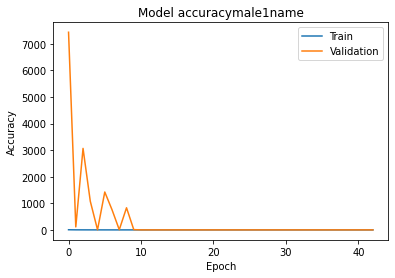

In [ ]:
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy'+male1name)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
male1=pd.read_csv("/content/drive/MyDrive/Thesis_sep_2021/test_results_male1name.csv")

In [ ]:
male1.describe()

,Unnamed: 0,T1,T2,P1,P2
count,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000
mean,2774.500000,0.720039,-0.141851,1.013820,-0.237754
std,1602.291328,7.067562,1.472068,6.689777,1.266367
min,0.000000,-12.568403,-4.150419,-16.851278,-5.642752
25%,1387.250000,-4.064155,-1.076542,-3.708450,-1.025818
50%,2774.500000,-0.340270,-0.193051,0.429940,-0.211420
75%,4161.750000,5.693209,1.037545,6.396683,0.714622
max,5549.000000,14.341976,2.383285,16.557968,2.804331


In [ ]:
y_true2=(79.2/(7.067562))*male1["T1"]+1777.6

In [ ]:
y_pred2=(79.2/(7.067562))*male1["P1"]+1777.6

In [ ]:
print("MAE of male testing for stature is ", mean_absolute_error(y_true2, y_pred2),"Millimeters")

MAE of male testing for stature is  13.99059603402212 Millimeters


In [ ]:
waist_true2=2*math.pi*male1["T2"]
waist_pred2=2*math.pi*male1["P2"]
waist_true2.describe()

count    5550.000000
mean       -0.891277
std         9.249273
min       -26.077852
25%        -6.764113
50%        -1.212972
75%         6.519087
max        14.974621
Name: T2, dtype: float64

In [ ]:
w_true2=(124.63/(9.249273))*waist_true2+914.19
w_pred2=(124.63/(9.249273))*waist_pred2+914.19
print("MAE of male testing for waist in males is ", mean_absolute_error(w_true2, w_pred2),"Millimeters")

MAE of male testing for waist in males is  38.654516063232144 Millimeters
